# Алешко Альберт АС-21-05 1 вариант
# Методы многомерной минимизации 

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
# from matplotlib import pyplot as plt
import scipy
from scipy.optimize import fsolve
from functools import partial

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
class LoggingCallback:
    """
    Класс для логирования шагов градиентного спуска.
    Сохраняет точку (x, f(x)) на каждом шаге.
    Пример использования в коде: callback(x, f(x))
    """
    def __init__(self):
        self.x_steps = []
        self.y_steps = []

    def __call__(self, x, y):
        self.x_steps.append(x)
        self.y_steps.append(y)

In [4]:
def plot_convergence_2d(func, steps, ax, xlim, ylim, cmap="viridis", title=""):
    """
    Функция отрисовки шагов градиентного спуска.
    Не меняйте её код без необходимости!
    :param func: функция, которая минимизируется градиентным спуском
    :param steps: np.array[N x 2] — шаги алгоритма
    :param ax: холст для отрисовки графика
    :param xlim: tuple(float), 2 — диапазон по первой оси
    :param ylim: tuple(float), 2 — диапазон по второй оси
    :param cmap: str — название палитры
    :param title: str — заголовок графика
    """

    ax.set_title(title, fontsize=20, fontweight="bold")
    # Отрисовка значений функции на фоне
    xrange = np.linspace(*xlim, 100)
    yrange = np.linspace(*ylim, 100)
    grid = np.meshgrid(xrange, yrange)
    X, Y = grid
    fvalues = func(
        np.dstack(grid).reshape(-1, 2)
    ).reshape((xrange.size, yrange.size))
    ax.pcolormesh(xrange, yrange, fvalues, cmap=cmap, alpha=0.8)
    CS = ax.contour(xrange, yrange, fvalues)
    ax.clabel(CS, CS.levels, inline=True)
    # Отрисовка шагов алгоритма в виде стрелочек
    arrow_kwargs = dict(linestyle="--", color="black", alpha=0.8)
    for i, _ in enumerate(steps):
        if i + 1 < len(steps):
            ax.arrow(
                *steps[i],
                *(steps[i+1] - steps[i]),
                **arrow_kwargs
            )
    # Отрисовка шагов алгоритма в виде точек
    n = len(steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(steps[:, 0], steps[:, 1], c=color_list, zorder=10)
    ax.scatter(steps[-1, 0], steps[-1, 1], color="red")
                #color="red", label=f"estimate = {np.round(steps[-1], 2)}")
    # Финальное оформление графиков
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_ylabel("$y$")
    ax.set_xlabel("$x$")
    ax.legend(fontsize=16)

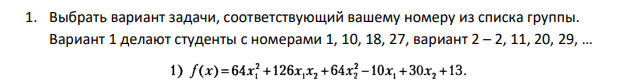

In [5]:
def f(x):
    return 64 * x[0]**2 + 126 * x[0] * x[1] + 64 * x[1]**2 - 10 * x[0] + 30 * x[1] + 13

In [6]:
def grad_f(x):
    dfdx1 = 128 * x[0] + 126 * x[1] - 10
    dfdx2 = 128 * x[1] + 126 * x[0] + 30
    return np.array([dfdx1, dfdx2])

In [7]:
def hesse_f(x, inv=False):
    hessian = np.array([[128, 126],
                        [126, 128]])
    if not inv:
        return hessian
    else:
        return np.linalg.inv(hessian)

In [8]:
x0 = np.array([5, -5])
tol = 1e-5

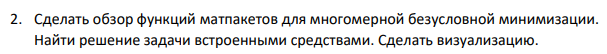

В функции minimize библиотеки Scipy есть множество различных методов (‘Nelder-Mead’, ‘Powell’, ‘CG’, ‘BFGS’, ‘Newton-CG’, ‘L-BFGS-B’, ‘TNC’, ‘COBYLA’, ‘SLSQP’, ‘trust-constr’, ‘dogleg’, ‘trust-ncg’, ‘trust-exact’, ‘trust-krylov’). По стандарту выбирается один из: ‘BFGS’, ‘L-BFGS-B’ или ‘SLSQP’, в зависмимости от найденных ограничений и заданных параметров. Стандартный метод справился, но выдал ряд каких-то warning'ов, поэтому я взял метод из прошлой лабы.

In [9]:
res = minimize(f, x0, method='Powell',
               options={'disp': True})
print(f'min x: {res.x}, f(x) = {f(res.x)}')

Optimization terminated successfully.
         Current function value: -187.393701
         Iterations: 3
         Function evaluations: 121
min x: [  9.96062996 -10.03937012], f(x) = -187.3937007874031


In [10]:
# x = np.outer(np.linspace(-11, 11, 1000), np.ones(1000))
# y = x.copy().T
# z = f((x, y))

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter(res.x[0], res.x[1], f(res.x), c='black', s=60);
# ax.plot_surface(x, y, z);

# plt.show()

Тут из-за отрисовки кажется, что минимум ниже самой функции, но это лишь кажется

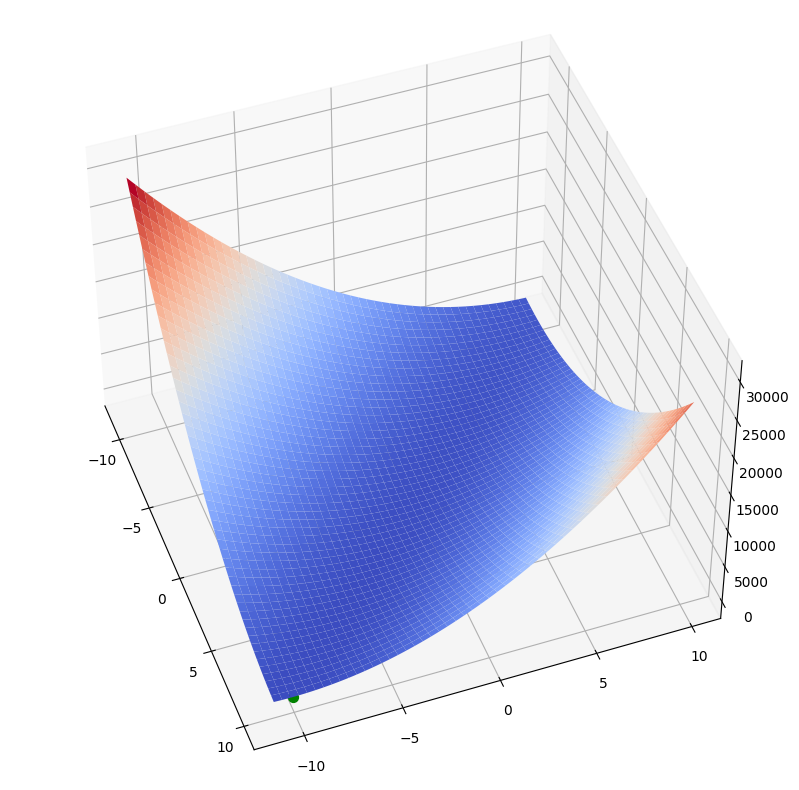

In [11]:
# Настраиваем 3D график
fig = plt.figure(figsize=[16, 10])
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection = '3d')

# Задаем угол обзора
ax.view_init(46, -20)

# Создаем данные для графика
X = np.arange(-11, 10, 0.01)
Y = np.arange(-11, 10, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.scatter(res.x[0], res.x[1], f(res.x), c='green', s=50);


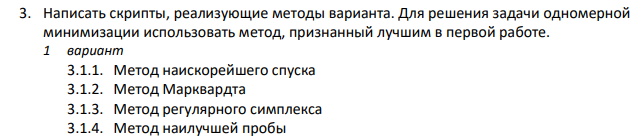

В прошлой лабе лучшим прямым методом был метод фибоначчи, методы требующие нахождения производной справились лучше, но это значительно усложнило бы реализацию текущих методов.

In [12]:
def fibonacci_numbers(max_value):

    num1, num2 = 1, 1
    
    yield num1
    
    if num1 > max_value and  num2 > max_value:
        return

    if num1 < max_value and num2 > max_value:
        yield num2

    while num2 < max_value:
        num1, num2 = num2, num1 + num2
        yield num2

In [13]:
def fibonacci_method(func, a, b, interval_length, eps, callback=None):
    
    if callback is None:
        callback = lambda c, v: 0
        
    max_value = (b - a) / interval_length
    fib_nums = [num for num in fibonacci_numbers(max_value)]
    length = len(fib_nums) - 1
    y = a + fib_nums[length - 2] / fib_nums[length] * (b - a)
    z = a + fib_nums[length - 1] / fib_nums[length] * (b - a)
    k = 1
    max_k = length - 3
    
    func_y, func_z = func(y), func(z)
    
    for k in range(max_k + 1):        
        if func_y <= func_z:
            less = True
            b, z = z, y
            y = a + fib_nums[length - k - 3] / fib_nums[length - k - 1] * (b - a)
            callback(b, func_z)
        else:
            less = False
            a, y = y, z
            z = a + fib_nums[length - k - 2] / fib_nums[length - k - 1] * (b - a)
            callback(a, func_y)
        func_y, func_z = (func(y), func_y) if less else (func_z, func(z))
        
    y = z
    z = y + eps
    x = (a + z) / 2 if func_y <= func(z) else (y + b) / 2
    callback(x, func(x))
    return x, max_k + 1

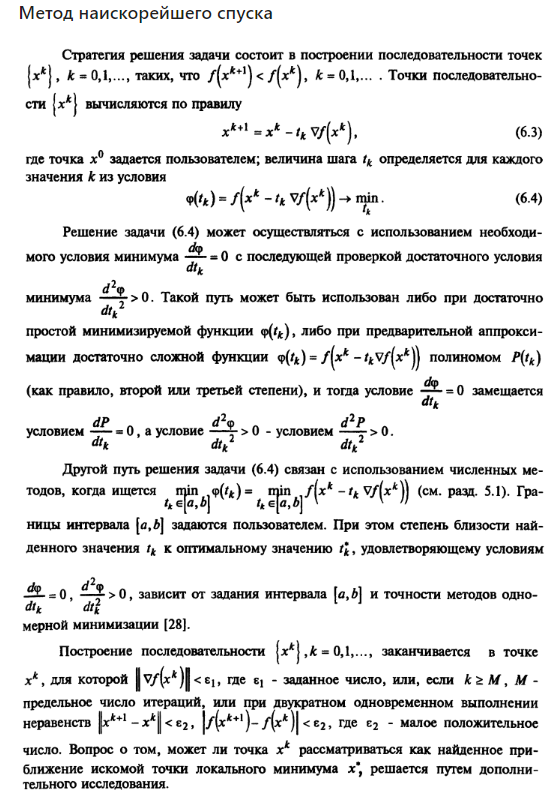

In [14]:
def steepest_descent_method(func, gfunc, x, eps,
                          lr_min=1e-7, lr_max=2,
                          n_eps=0.1, max_iter=100_000,
                          callback=None, print_info=False):
    
    if callback is None:
        callback = lambda c, v: 0
    
    def fi(t, x, d):
        nonlocal func
        return func(x + t * d)
    
    fib_k = 0
    
    for k in range(max_iter):
        callback(x, func(x))
        grad = gfunc(x)
        d = - grad
        fi_x_d = partial(fi, x=x, d=d)
        t, fc = fibonacci_method(fi_x_d, lr_min, lr_max, n_eps, n_eps/2)
        fib_k += fc
        t = 0.001
        x_prev = x
        x = x + t * d
        
        if np.linalg.norm(grad) < eps:
            callback(x, func(x))
            print(fib_k)
            return x, k + 1

    if print_info:
        print('Max iterations. Stop')
    callback(x, func(x))
    print(fib_k)
    return x, max_iter

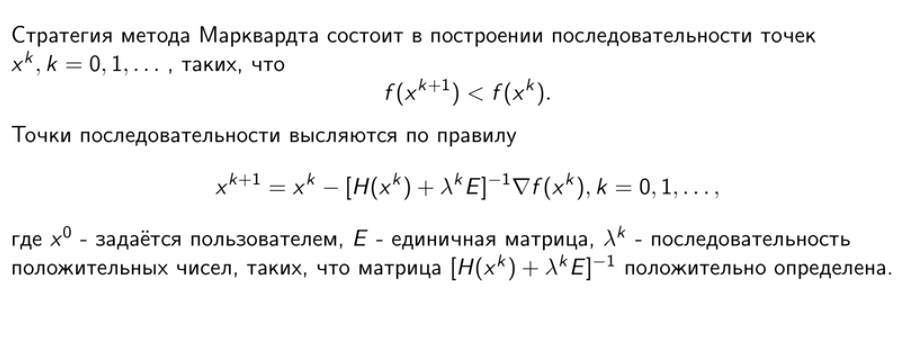

In [15]:
def marquardt_method(func, gfunc, hfunc, x, eps, mu=1e4,
                     max_iter=100_000, callback=None, print_info=False):
    
    if callback is None:
        callback = lambda c, v: 0
    func_x_prev = func(x)
        
    for k in range(max_iter):
        
        callback(x, func(x))
        grad = gfunc(x)
        
        if np.linalg.norm(grad) < eps:
            callback(x, func(x))
            return x, k + 1
        
        hesse = hfunc(x)
        d = - np.linalg.inv(hesse + mu * np.eye(2)) @ grad
        x = x + d
        func_x = func(x)
        mu = mu / 2 if func_x < func_x_prev else mu * 2
        func_x_prev = func_x

    if print_info:
        print('Max iterations. Stop')
    callback(x, func(x))
    return x, max_iter

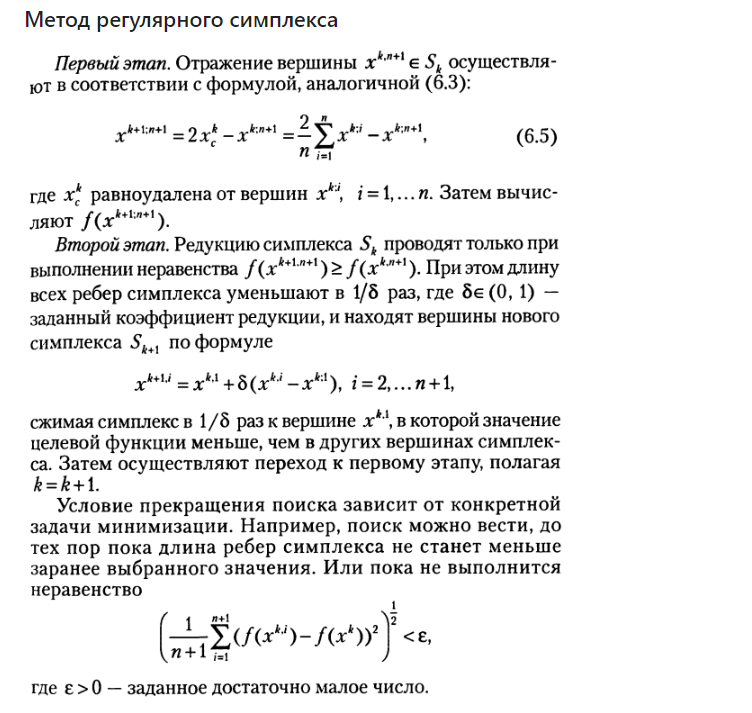

In [16]:
def get_simplex(x, length, n=2):
    simplex = np.array([x, np.zeros(2), np.zeros(2)])
    
    for i in range(1, len(simplex)):
        for j in range(n):
            if i == j + 1:
                simplex[i][j] = (simplex[0][j]
                                + (np.sqrt(n + 1) - 1) / (n * np.sqrt(2)) * length)
            else:
                simplex[i][j] = (simplex[0][j]
                                 + (np.sqrt(n + 1) + n - 1) / (n * np.sqrt(2)) * length)
    return simplex

In [17]:
cccc = []

In [18]:
def simplex_reduction(simplex, delta):
    for i in range(1, len(simplex)):
        simplex[i] = simplex[0] + delta * (simplex[i] - simplex[0])
    cccc.append(1)
    return simplex

In [19]:
def regular_simplex_method(func, x, length, eps, delta=0.86,
                           n=2, max_iter=100_000, callback=None,
                          print_info=False):
    
    if callback is None:
        callback = lambda c, v: 0
    
    idx_max_f = None
    vect_func = np.vectorize(f, signature="(n)->()")
    simplex = get_simplex(x, length, n)
    func_x = vect_func(simplex)
    callback(x, func(x))
    
    for k in range(max_iter):
        
        if idx_max_f is None:
            idx_max_f = np.argmax(func_x)
            another_idx = [i for i in range(n + 1) if i != idx_max_f]

        cm = np.sum(np.array([simplex[i] for i in range(n + 1) if i != idx_max_f]), axis=0)
        new_vertex = (2 / n * cm - simplex[idx_max_f])
        func_x_new = func(new_vertex)
        
        if func_x_new < func_x[idx_max_f]:
            callback(new_vertex, func(new_vertex))
            func_x_prev = func_x
            func_x[idx_max_f] = func_x_new
            simplex[idx_max_f] = new_vertex
            idx_max_f = None

        else:
            if len(another_idx) == 0:
                simplex = simplex_reduction(simplex, delta)
                k+=1
                length = length * delta
                if length * 2 < eps:
                    return np.mean(simplex, axis=0), k + 1
                idx_max_f = None
            else:
                idx_max_f = another_idx[0]
                another_idx = [idx for idx in another_idx if idx != another_idx[0]]
            
        
    if print_info:
        print('Max iterations. Stop')
    callback(np.mean(simplex, axis=0), func(x))
    return np.mean(simplex, axis=0), max_iter

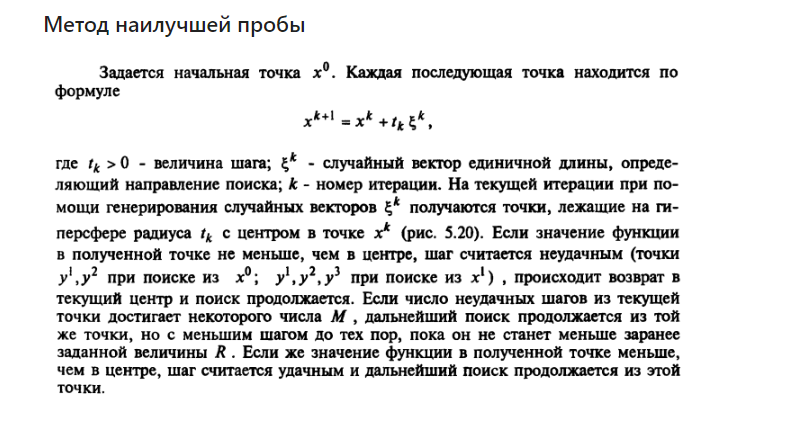

In [20]:
def best_test_method(func, x, min_lr, betta=0.3, m=20,
                     lr=1, max_iter=100_000,
                     callback=None, print_info=False):
    
    if callback is None:
        callback = lambda c, v: 0
    
    vect_func = np.vectorize(func, signature="(n)->()")
    
    for k in range(max_iter):
        np.random.seed(k)
        vectors = np.random.uniform(-1, 1, size=(m, 2))
        vectors = vectors / np.linalg.norm(vectors, axis=1)[..., None]
        y = x + lr * vectors
        func_y = vect_func(y)
        idx_min_func = np.argmin(func_y)
        if func_y[idx_min_func] < func(x):
            x = y[idx_min_func]
            callback(x, func(x))
        else:
            lr = lr * betta
            if lr < min_lr:
                return x, k + 1
            
    return x, max_iter

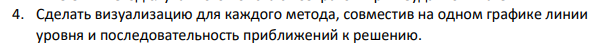

28300


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


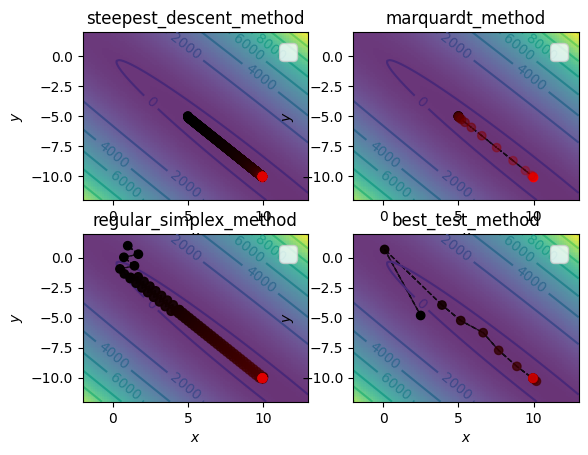

In [21]:
fig, ax = plt.subplots(2, 2)

callback = LoggingCallback()
sdx, sdk = steepest_descent_method(f, grad_f, x0, tol, callback=callback)
plot_convergence_2d(np.vectorize(f, signature="(n)->()"),
                    np.vstack(callback.x_steps),
                    ax=ax[0, 0],
                    xlim=(-2, 13),
                    ylim=(-12, 2),
                   )
ax[0, 0].set_title('steepest_descent_method')

callback = LoggingCallback()
mx, mk = marquardt_method(f, grad_f, hesse_f, x0, tol, callback=callback)
plot_convergence_2d(np.vectorize(f, signature="(n)->()"),
                    np.vstack(callback.x_steps),
                    ax=ax[0, 1],
                    xlim=(-2, 13),
                    ylim=(-12, 2),
                   )
ax[0, 1].set_title('marquardt_method')

x0 = np.array([1,1])
callback = LoggingCallback()
rsx, rsk = regular_simplex_method(f, x0, 1, tol,delta = 0.55, callback=callback)
plot_convergence_2d(np.vectorize(f, signature="(n)->()"),
                    np.vstack(callback.x_steps),
                    ax=ax[1, 0],
                    xlim=(-2, 13),
                    ylim=(-12, 2),
                   )
ax[1, 0].set_title('regular_simplex_method')

callback = LoggingCallback()
btx, btk = best_test_method(f, x0, tol, lr=6, callback=callback)
plot_convergence_2d(np.vectorize(f, signature="(n)->()"),
                    np.vstack(callback.x_steps),
                    ax=ax[1, 1],
                    xlim=(-2, 13),
                    ylim=(-12, 2),
                   )
ax[1, 1].set_title('best_test_method')
plt.show()

In [22]:
# tol = 1e-5
results = {
    'method': ['steepest_descent_method', 'marquardt_method', 'regular_simplex_method', 'best_test_method'],
    'iterations': [sdk, mk, rsk, btk],
    'func_evals': [sdk + 28300, mk + 1, rsk + 21 * 2 + 2, 21*btk],
    'grad_evals': [sdk, mk, 0, 0],
    'hesse_eval': [0, mk, 0, 0],
    '[x1, x2]': [np.round(sdx, 6), np.round(mx, 6), np.round(rsx, 6), np.round(btx, 6)],
    'f(x)': [np.round(f(sdx), 6), np.round(f(mx), 6), np.round(f(rsx), 6), np.round(f(btx), 6)],
    '||x - x*|| < eps': [np.linalg.norm(sdx - res.x) < tol, np.linalg.norm(mx - res.x) < tol,
                        np.linalg.norm(rsx - res.x) < tol, np.linalg.norm(btx - res.x)  < tol]
    
}
pd.DataFrame(results)

,method,iterations,func_evals,grad_evals,hesse_eval,"[x1, x2]",f(x),||x - x*|| < eps
0,steepest_descent_method,7075,35375,7075,0,"[9.960626, -10.039367]",-187.393701,True
1,marquardt_method,20,21,20,20,"[9.960629, -10.039369]",-187.393701,True
2,regular_simplex_method,425,469,0,0,"[9.960578, -10.039319]",-187.393701,False
3,best_test_method,37,777,0,0,"[9.960633, -10.039373]",-187.393701,True


In [23]:
np.linalg.norm(rsx - res.x), np.linalg.norm(btx - res.x), np.round(res.x,6)

(7.32755635173922e-05, 4.477342159112955e-06, array([  9.96063, -10.03937]))

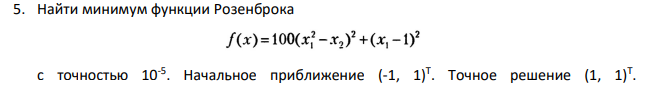

In [24]:
x0 = np.array([-1, 1])
def rosen(x):
    """The Rosenbrock function"""
    return 100.0*(x[0]**2-x[1])**2.0 + (x[0]-1)**2.0

In [25]:
def rosen_grad(x):
    dfdx = 400 * x[0]**3 - 400 * x[0] * x[1] + 2 * x[0] - 2
    dfdy = -200 * x[0] ** 2 + 200 * x[1]
    return np.array([dfdx, dfdy])

In [26]:
res = minimize(rosen, x0, method='Powell',
    options={'xtol': 1e-8, 'disp': True})
print(res.x[0], res.x[1])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 708
0.9999999999998214 0.9999999999996438


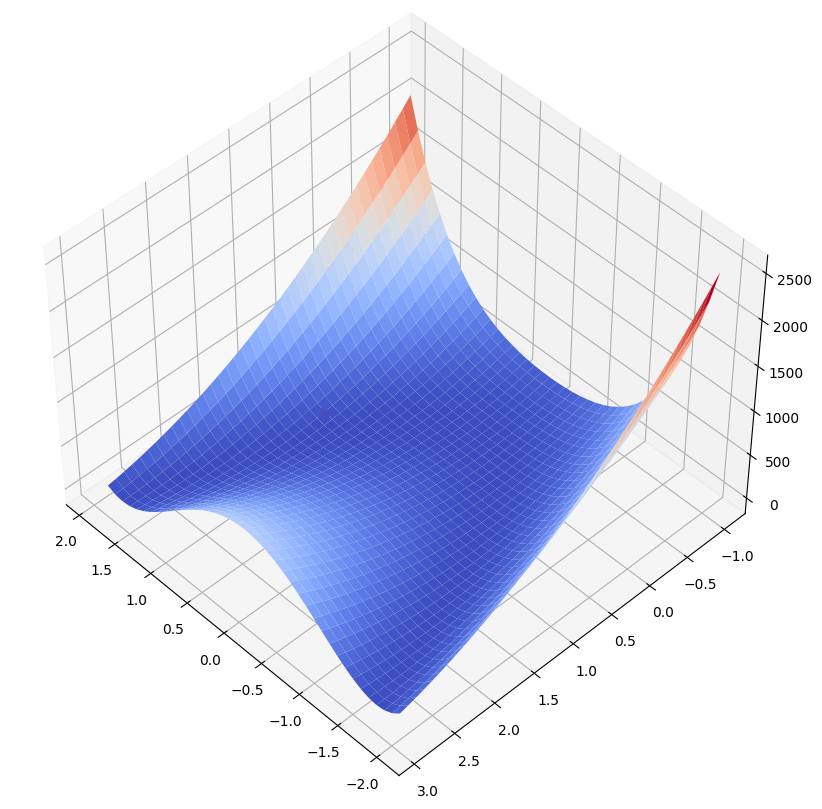

In [27]:
# Настраиваем 3D график
fig = plt.figure(figsize=[16, 10])
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection = '3d')

# Задаем угол обзора
ax.view_init(46, 136)

# Создаем данные для графика
X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosen(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.scatter(res.x[0], res.x[1], f(res.x), c='red', s=50);
plt.show()

Видно плохо, но там красное перекрестье в районе [1,1]

In [28]:
def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

105088


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


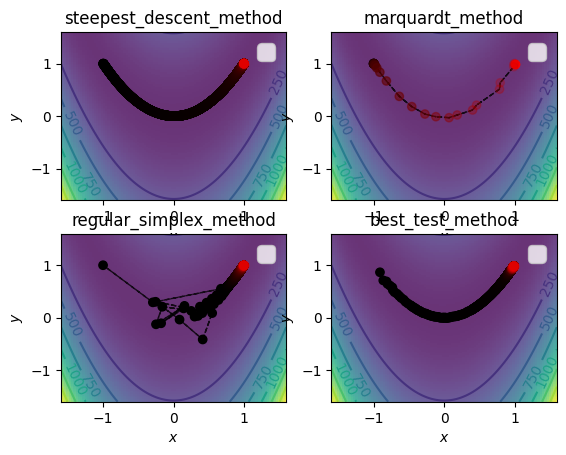

In [29]:
fig, ax = plt.subplots(2, 2)

callback = LoggingCallback()
sdx, sdk = steepest_descent_method(rosen, rosen_grad, x0, tol, callback=callback)
plot_convergence_2d(np.vectorize(rosen, signature="(n)->()"),
                    np.vstack(callback.x_steps),
                    ax=ax[0, 0],
                    xlim=(-1.6, 1.6),
                    ylim=(-1.6, 1.6),
                   )
ax[0, 0].set_title('steepest_descent_method')

callback = LoggingCallback()
mx, mk = marquardt_method(rosen, rosen_grad, rosen_hess, x0, tol, callback=callback)
plot_convergence_2d(np.vectorize(rosen, signature="(n)->()"),
                    np.vstack(callback.x_steps),
                    ax=ax[0, 1],
                    xlim=(-1.6, 1.6),
                    ylim=(-1.6, 1.6),
                   )
ax[0, 1].set_title('marquardt_method')

callback = LoggingCallback()
rsx, rsk = regular_simplex_method(rosen, x0, 1, tol, delta = .96, callback=callback)
plot_convergence_2d(np.vectorize(rosen, signature="(n)->()"),
                    np.vstack(callback.x_steps),
                    ax=ax[1, 0],
                    xlim=(-1.6, 1.6),
                    ylim=(-1.6, 1.6),
                   )
ax[1, 0].set_title('regular_simplex_method')

callback = LoggingCallback()
btx, btk = best_test_method(rosen, x0, tol, lr=6, callback=callback)
plot_convergence_2d(np.vectorize(rosen, signature="(n)->()"),
                    np.vstack(callback.x_steps),
                    ax=ax[1, 1],
                    xlim=(-1.6, 1.6),
                    ylim=(-1.6, 1.6),
                   )
ax[1, 1].set_title('best_test_method')
plt.show()

In [33]:
results = {
    'method': ['steepest_descent_method', 'marquardt_method', 'regular_simplex_method', 'best_test_method'],
    'iterations': [sdk, mk, rsk, btk],
    'func_evals': [sdk + 106088, mk + 1, rsk + len(cccc)*2 + 2, 21*btk],
    'grad_evals': [sdk, mk, 0, 0],
    'hesse_eval': [0, mk, 0, 0],
    '[x1, x2]': [np.round(sdx, 6), np.round(mx, 6), np.round(rsx, 6), np.round(btx, 6)],
    'f(x)': [np.round(rosen(sdx), 6), np.round(rosen(mx), 6), np.round(rosen(rsx), 6), np.round(rosen(btx), 6)],
    '||x - x*|| < eps': [np.linalg.norm(sdx - res.x) < tol, np.linalg.norm(mx - res.x) < tol,
                        np.linalg.norm(rsx - res.x) < tol, np.linalg.norm(btx - res.x)  < tol]
    
}
pd.DataFrame(results)

,method,iterations,func_evals,grad_evals,hesse_eval,"[x1, x2]",f(x),||x - x*|| < eps
0,steepest_descent_method,26272,132360,26272,0,"[0.999989, 0.999978]",0.000000,False
1,marquardt_method,27,28,27,27,"[1.0, 1.0]",0.000000,True
2,regular_simplex_method,11567,12211,0,0,"[0.998165, 0.996328]",0.000003,False
3,best_test_method,9893,207753,0,0,"[0.993153, 0.986328]",0.000047,False


In [31]:
np.linalg.norm(sdx - res.x), np.linalg.norm(mx - res.x), np.linalg.norm(rsx - res.x), np.linalg.norm(btx - res.x)

(2.5021567864703224e-05,
 4.923799942789188e-07,
 0.0041050556158902796,
 0.015290481906691602)

Функция Розенброка является стандартной тестовой функцией в оптимизации. Она имеет уникальное минимальное значение 0 в точке [1,1]. Нахождение минимума является проблемой для некоторых алгоритмов, потому что функция имеет неглубокий минимум в очень кривом овраге. Что мы и можем наблюдать в данном примере, ведь необходимая точность достигнута не была, хотя и значения весьма близкие к истине.

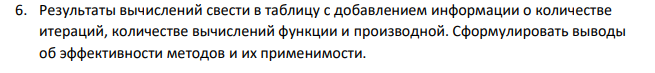




Метод наискорейшего спуска является самым универсальным из представленных, так как требует знание только функции и её градиента, найти которые достаточно просто. При этом скорость нахождения минимума сравнимо низкая, но при этом, если произвести очень много итераций, то нахождение минимума возможно.

Метод Марквардта является самым эффективным, но при этом требует  и знание функции, и её градиента, и матрицы Гессе. Метод собрал в себя все плюсы метода Ньютона и градиентного спуска и выполняет немного итераций и вычислений функции.

Метод регулярного симплекса использует знания только о функции, но при этом из-за использования симплекса (особенно из-за его формы), использование этого метода для нахождения минимума, во многих случаях, весьма затруднительно из-за требовательности в каждом случае подбирать параметры. При этом методы выполняет относительно немного итераций и вычислений функции.

Метод наилучшей пробы является наиболее ресурсозатратным, но при этом самый простой в реализации. Нахождение минимума абсолютно непредсказуемо, но при очень большом количестве итераций и использовании достаточного количества случайных векторов, возможно.

In [32]:
len(cccc)

321